In [27]:
#유통회사 수에 따른 관객수에 차이가 있을까 
#anova:대략적 정규, 독립, 등분산성
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats 
data=pd.read_csv('..\\..\\dataPreprocessing\\k_movie_2.csv')
data

,MOVIE_NM,DRCTR_NM,MAKR_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,VIEWNG_NMPR_CO,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM,CRITIC_RT,VIEWER_RT,YEAR,MONTH,SUCCESS,DISTB_CMPNY_COUNT
0,산상수훈,유영의,(주)그란,"['이언픽쳐스', '(주)그란']",20171207,개봉영화,장편,한국,71.0,284.0,284.0,드라마,전체관람가,독립/예술영화,3,6,2017,12,0.0,2
1,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",['커넥트픽쳐스(주)'],20190516,개봉영화,장편,한국,200.0,154.0,154.0,다큐멘터리,전체관람가,독립/예술영화,5,9,2019,5,0.0,1
2,기생충,봉준호,(주)바른손이앤에이,['(주)씨제이이엔엠'],20190530,개봉영화,장편,한국,1948.0,227811.0,97354.0,드라마,15세이상관람가,일반영화,9,8,2019,5,1.0,1
3,이타미 준의 바다,정다운,기린그림,['(주)영화사 진진'],20190815,개봉영화,장편,한국,57.0,144.0,144.0,다큐멘터리,전체관람가,독립/예술영화,6,8,2019,8,0.0,1
4,벌새,김보라,에피파니(주),"['(주)엣나인필름', '(주)콘텐츠판다']",20190829,개봉영화,장편,한국,145.0,2721.0,2082.0,드라마,15세이상관람가,독립/예술영화,5,7,2019,8,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2차 송환,김동원,푸른영상,['(주)시네마달'],2022-09-,개봉영화,장편,한국,16.0,415.0,373.0,다큐멘터리,12세이상관람가,독립/예술영화,8,6,2022,9,0.0,1
354,EBS친구들 씽씽 댄스파티,감독명 누락,한국교육방송공사 EBS,['(주)에픽캔'],2022-09-,개봉영화,장편,한국,1.0,60.0,22.0,가족,전체관람가,일반영화,5,7,2022,9,0.0,1
355,당신의 이웃은 친절하지 않다,안드로,(주)빅픽처,['주식회사 씨엠닉스'],2022-09-,개봉영화,장편,한국,9.0,395.0,250.0,미스터리,15세이상관람가,독립/예술영화,5,7,2022,9,0.0,1
356,부적: 남의 운을 빼앗는 자,김세성,머지션스토어,['(주)트리플픽쳐스'],2022-09-,개봉영화,장편,한국,6.0,662.0,336.0,액션,12세이상관람가,독립/예술영화,5,8,2022,9,0.0,1


In [20]:
data=data.dropna(subset=['VIEWNG_NMPR_CO', 'DISTB_CMPNY_NM'])
data['DISTB_CMPNY_NM']=data['DISTB_CMPNY_NM'].apply(lambda x: str(x).split(','))

In [21]:
count=[]
for i in range(len(data)):
    count.append(len(data['DISTB_CMPNY_NM'][i]))
count

[2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,


In [22]:
data['DISTB_CMPNY_COUNT']=count

In [23]:
data

,Unnamed: 0,MOVIE_NM,DRCTR_NM,MAKR_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,VIEWNG_NMPR_CO,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM,Unnamed: 0.1,CRITIC_RT,VIEWER_RT,DISTB_CMPNY_COUNT
0,0,산상수훈,유영의,(주)그란,"[이언픽쳐스, (주)그란]",20171207,개봉영화,장편,한국,71.0,284.0,284.000000,드라마,전체관람가,독립/예술영화,NaN,3.00,6.30,2
1,1,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",[커넥트픽쳐스(주)],20190516,개봉영화,장편,한국,200.0,154.0,154.000000,다큐멘터리,전체관람가,독립/예술영화,1.0,5.59,9.31,1
2,2,기생충,봉준호,(주)바른손이앤에이,[(주)씨제이이엔엠],20190530,개봉영화,장편,한국,1948.0,227811.0,97354.000000,드라마,15세이상관람가,일반영화,2.0,9.06,8.49,1
3,3,엑시트,이상근,"(주)외유내강,(주)필름케이",[(주)씨제이이엔엠],20190731,개봉영화,장편,한국,1660.0,40.0,26656.504132,코미디,12세이상관람가,일반영화,3.0,5.59,7.44,1
4,4,김복동,송원근,한국탐사저널리즘센터,[(주)엣나인필름],20190808,개봉영화,장편,한국,366.0,110.0,26656.504132,다큐멘터리,12세이상관람가,독립/예술영화,4.0,6.60,8.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,530,2차 송환,김동원,푸른영상,[(주)시네마달],2022-09-,개봉영화,장편,한국,16.0,415.0,373.000000,다큐멘터리,12세이상관람가,독립/예술영화,530.0,8.20,6.44,1
379,531,EBS친구들 씽씽 댄스파티,NaN,한국교육방송공사 EBS,[(주)에픽캔],2022-09-,개봉영화,장편,한국,1.0,60.0,22.000000,가족,전체관람가,일반영화,531.0,5.59,7.44,1
380,537,당신의 이웃은 친절하지 않다,안드로,(주)빅픽처,[주식회사 씨엠닉스],2022-09-,개봉영화,장편,한국,9.0,395.0,250.000000,미스터리,15세이상관람가,독립/예술영화,537.0,5.59,7.47,1
381,541,부적: 남의 운을 빼앗는 자,김세성,머지션스토어,[(주)트리플픽쳐스],2022-09-,개봉영화,장편,한국,6.0,662.0,336.000000,액션,12세이상관람가,독립/예술영화,541.0,5.59,8.84,1


In [24]:
import matplotlib as mpl
print(mpl.matplotlib_fname())
print(mpl.get_cachedir())
mpl.rcParams['font.family']='NanumGothic'

c:\Users\gus10\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\gus10\.matplotlib


KeyError: 'DISTB_CMPNY_NUMBER'

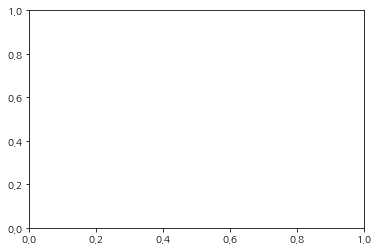

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(data['DISTB_CMPNY_NUMBER'] , 
        data['VIEWNG_NMPR_CO'],
        marker='o', 
        linestyle='')
ax.legend(fontsize=12, bbox_to_anchor=(1,1)) # legend position

plt.title('영화 관객수과 스크린수', fontsize=20)

plt.xlabel('유통회사 수', fontsize=14)

plt.ylabel('관객수 액', fontsize=14)

plt.show()

In [ ]:
from scipy.stats import shapiro, levene
#정규성 검사 - 비정규
print(shapiro(data['VIEWNG_NMPR_CO']))

ShapiroResult(statistic=0.23703008890151978, pvalue=9.812195872917189e-37)


In [ ]:
data['DISTB_CMPNY_NUMBER'].unique()

array([2, 1, 3], dtype=int64)

In [ ]:
from scipy.stats import kruskal
stats.kruskal(data.dropna()['VIEWNG_NMPR_CO'][data.dropna()['DISTB_CMPNY_NUMBER']=='1'],
data.dropna()['VIEWNG_NMPR_CO'][data.dropna()['DISTB_CMPNY_NUMBER']=='2'],
data.dropna()['VIEWNG_NMPR_CO'][data.dropna()['DISTB_CMPNY_NUMBER']=='3'],)

KruskalResult(statistic=nan, pvalue=nan)

In [ ]:
data['VIEWNG_NMPR_CO'][data['DISTB_CMPNY_NUMBER']=='1']

Series([], Name: VIEWNG_NMPR_CO, dtype: float64)

In [ ]:
from scipy import stats
stats.kruskal(data['VIEWNG_NMPR_CO'][data['DISTB_CMPNY_NUMBER'] == 1],
    data['VIEWNG_NMPR_CO'][data['DISTB_CMPNY_NUMBER'] == 2],
    data['VIEWNG_NMPR_CO'][data['DISTB_CMPNY_NUMBER'] == 3])

#p-valued=0.06106889404258816 > 0.05 이므로 유통회사에 따른 평균의 차이가 없다.

KruskalResult(statistic=5.591505283157728, pvalue=0.06106889404258816)

In [ ]:
#test